In [1]:
from astropy.io import fits
import astropy.units as u
import astropy.constants as c
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

In [3]:
import os

In [4]:
import sys
sys.path.append('../../tools/')
from dust_extinction import calALambda
from data_binning import data_binning

In [5]:
Sci_folder = 'keck_deimos_pypeit/Science/'
ls = [
    i for i in os.listdir(Sci_folder)
    if ('SN2020jgb' in i and 'fits' in i and 'spec1d' in i)
]
ls_cal = [
    i for i in os.listdir(Sci_folder)
    if ('HZ' in i and 'fits' in i and 'spec1d' in i)
]

## Standard stars

In [6]:
f = fits.open(Sci_folder+ls_cal[1])
f.info()
print(repr(f[0].header))
f.close()

Filename: keck_deimos_pypeit/Science/spec1d_d0331_0029-HZ44_DEIMOS_20220331T104558.694.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   ()      
  1  SPAT0726-SLIT0736-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  SPAT0725-SLIT0736-DET07    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  DET03-DETECTOR    1 BinTableHDU     34   1R x 2C   [1D, 1D]   
  4  DET07-DETECTOR    1 BinTableHDU     34   1R x 2C   [1D, 1D]   
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                

In [7]:
output = 'spec1d_d0331_0030-HZ44_DEIMOS_20220331T104910.934.fits'
#os.system('cp {} {}'.format(Sci_folder + ls_cal[0], Sci_folder + output))

[3914.74953834 3915.34609819] [6478.02504701 6478.67431832]
[3913.16744135 3913.77082746] [6480.30468813 6480.9516352 ]
[6491.73228022 6492.3795526 ] [9124.42931412 9125.06087826]
[6494.1867373  6494.83207539] [9127.47995328 9128.11796444]


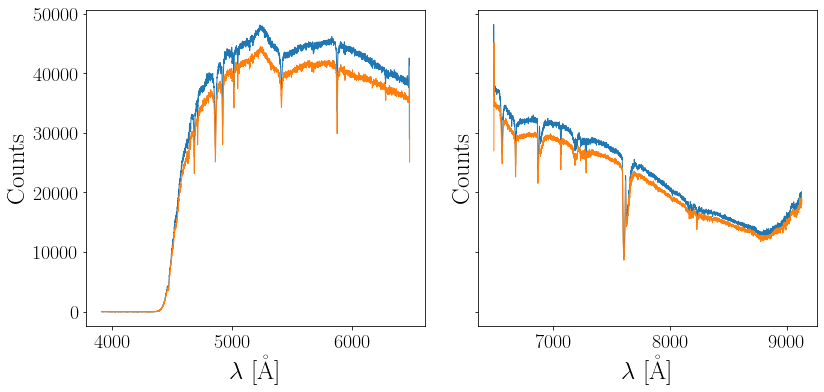

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
ax = ax.flatten()
for k in np.arange(2) + 1:
    Wav = None
    Counts = None
    Mask = None
    for m, l in enumerate(ls_cal):
        f = fits.open(Sci_folder + l)
        specdata = f[k].data
        mask = specdata['OPT_MASK']
        wav = specdata['OPT_WAVE']
        counts = specdata['OPT_COUNTS']
        print(wav[mask][0:2], wav[mask][-3:-1])
        f.close()
        
        ###co-adding
        if m == 0:
            Wav = wav
            Counts = counts
            Mask = mask
        elif m != 1:
            Wav += wav
            Counts += counts
            Mask = [i and j for (i, j) in zip(Mask, mask)]
        #plt.xlim(wav[wav > 8200][0], wav[wav > 8200][-1])
        ax[k-1].plot(wav[mask], counts[mask], linewidth=1, label=l)
    Wav = Wav/(len(ls_cal)-1)
    Counts = Counts/(len(ls_cal)-1)
    ax[k-1].set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
    ax[k-1].set_ylabel(r'$\mathrm{Counts}$')
'''    
    with fits.open(Sci_folder + output, 'update') as fout:
        fout[k].data['OPT_MASK'] = Mask
        fout[k].data['OPT_WAVE'] = Wav
        fout[k].data['OPT_COUNTS'] = Counts
        fout.flush()
        
    with fits.open(Sci_folder + output) as fout:
        mask = fout[k].data['OPT_MASK']
        wav = fout[k].data['OPT_WAVE']
        counts = fout[k].data['OPT_COUNTS']
        ax[k-1].plot(wav[mask], counts[mask], color='k')'''

fig.tight_layout()
plt.show()

## Sensitivity function

Filename: keck_deimos_pypeit/Fluxing/Keck_DEIMOS_sens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  SENS          1 BinTableHDU     59   2R x 11C   [4096D, 4096D, 4096D, 4096L, 4096D, 4096L, D, K, K, D, D]   
  2  WAVE          1 ImageHDU        19   (1, 16317)   float64   
  3  ZEROPOINT     1 ImageHDU        19   (1, 16317)   float64   
  4  THROUGHPUT    1 ImageHDU        19   (1, 16317)   float64   
None
(numpy.record, [('SENS_WAVE', '>f8', (4096,)), ('SENS_COUNTS_PER_ANG', '>f8', (4096,)), ('SENS_ZEROPOINT', '>f8', (4096,)), ('SENS_ZEROPOINT_GPM', 'i1', (4096,)), ('SENS_ZEROPOINT_FIT', '>f8', (4096,)), ('SENS_ZEROPOINT_FIT_GPM', 'i1', (4096,)), ('SENS_COEFF', '>f8', (1,)), ('ECH_ORDERS', '>i8'), ('POLYORDER_VEC', '>i8'), ('WAVE_MIN', '>f8'), ('WAVE_MAX', '>f8')])


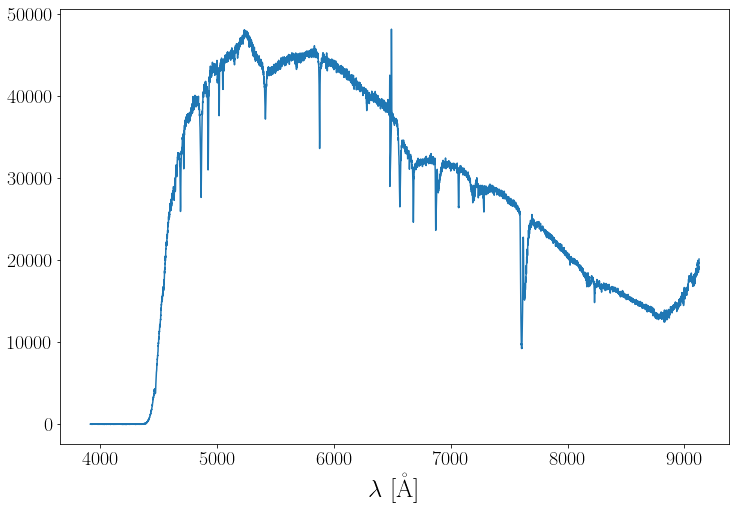

In [9]:
Flux_folder = 'keck_deimos_pypeit/Fluxing/'
Wav = []
S = []
plt.figure(figsize=(12, 8))
#for i in np.arange(41, 45):
f = fits.open(Flux_folder + 'Keck_DEIMOS_sens.fits')
print(f.info())
sens = f[1].data
print(sens.dtype)
wav = np.array(sens['SENS_WAVE'])
s = sens['SENS_COUNTS_PER_ANG']
S.append(s)
plt.plot(wav[wav!=0], s[wav!=0])
Wav.append(sens['SENS_WAVE'])
#plt.xlim(8000, 25500)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
#plt.show()
f.close()
#Wav = np.mean(Wav, axis=0)
#S = np.mean(S, axis=1)
#Wav.shape

## Calibrated spectrum for each exposure

### Standard star: HZ44

spec1d_d0331_0030-HZ44_DEIMOS_20220331T104910.934.fits
Filename: keck_deimos_pypeit/Science/spec1d_d0331_0030-HZ44_DEIMOS_20220331T104910.934.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  SPAT0931-SLIT0947-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  SPAT0931-SLIT0948-DET07    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  DET03-DETECTOR    1 BinTableHDU     34   1R x 2C   [1D, 1D]   
  4  DET07-DETECTOR    1 BinTableHDU     34   1R x 2C   [1D, 1D]   
None


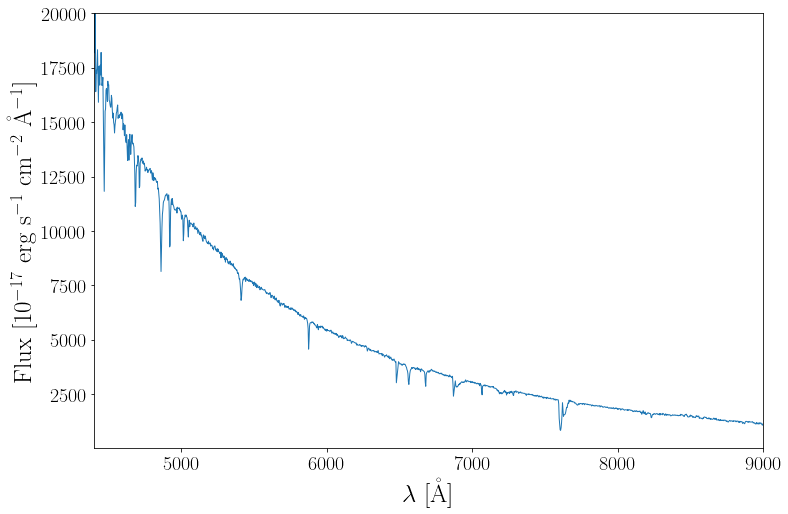

spec1d_d0331_0029-HZ44_DEIMOS_20220331T104558.694.fits
Filename: keck_deimos_pypeit/Science/spec1d_d0331_0029-HZ44_DEIMOS_20220331T104558.694.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   ()      
  1  SPAT0726-SLIT0736-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  SPAT0725-SLIT0736-DET07    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  DET03-DETECTOR    1 BinTableHDU     34   1R x 2C   [1D, 1D]   
  4  DET07-DETECTOR    1 BinTableHDU     34   1R x 2C   [1D, 1D]   
None


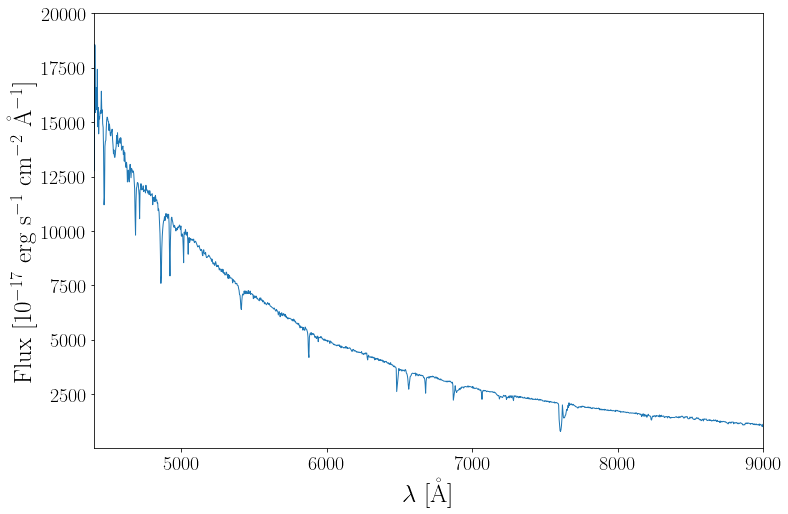

In [10]:
for m, l in enumerate(ls_cal):
    plt.figure(figsize=(12, 8))
    print(l)
    for k in np.arange(1):
        f = fits.open(Sci_folder + l)
        print(f.info())
        #break
        specdata1 = f[1].data
        specdata2 = f[2].data
        wav = np.append(specdata1['OPT_WAVE'], specdata2['OPT_WAVE'])
        #print(specdata)
        flux = np.append(specdata1['OPT_FLAM'], specdata2['OPT_FLAM'])
        f.close()
        plt.plot(wav[::5], flux[::5], linewidth=1)
        plt.xlim(4400, 9000)
        plt.ylim(1e1, 2e4)
        plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
        plt.ylabel(
            r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
        )
    plt.show()

### SN2020jgb_host

spec1d_d0331_0043-SN2020jgb_host_DEIMOS_20220331T142045.859.fits
Filename: keck_deimos_pypeit/Science/spec1d_d0331_0043-SN2020jgb_host_DEIMOS_20220331T142045.859.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      50   ()      
  1  SPAT0243-SLIT0314-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  SPAT0574-SLIT0525-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  SPAT0726-SLIT0736-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  4  SPAT0994-SLIT0947-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D,

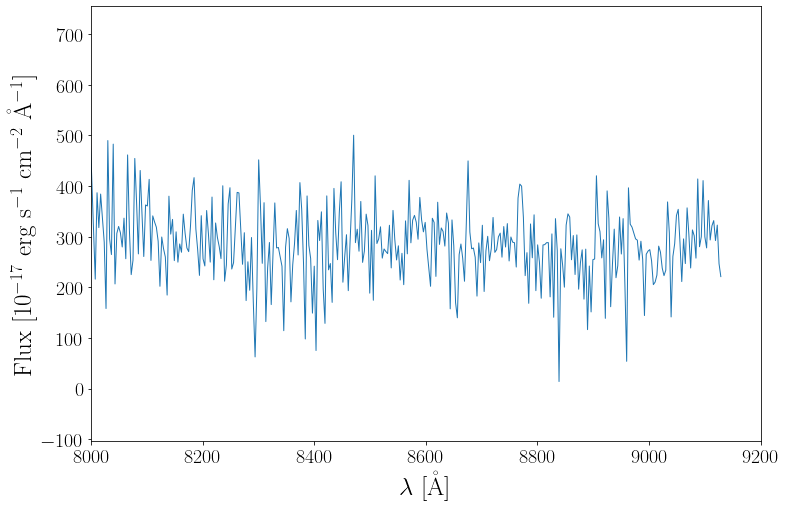

spec1d_d0331_0044-SN2020jgb_host_DEIMOS_20220331T143516.944.fits
Filename: keck_deimos_pypeit/Science/spec1d_d0331_0044-SN2020jgb_host_DEIMOS_20220331T143516.944.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1  SPAT0243-SLIT0314-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  SPAT0574-SLIT0525-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  SPAT0725-SLIT0736-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  4  SPAT0241-SLIT0313-DET07    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D,

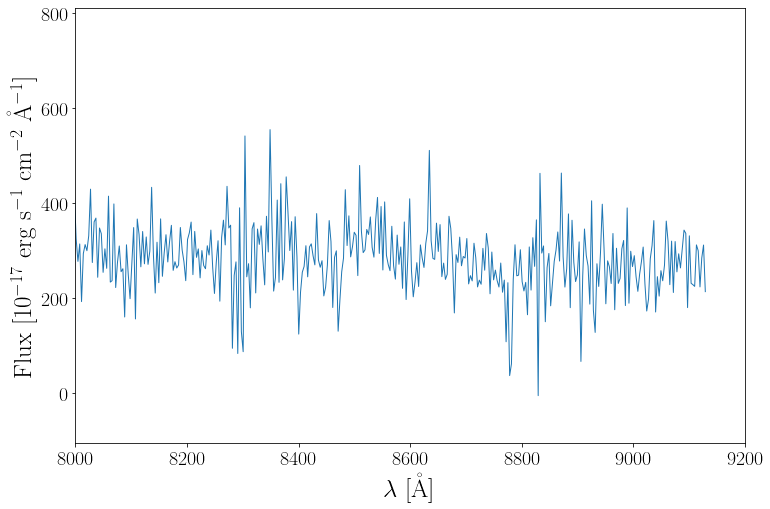

spec1d_d0331_0041-SN2020jgb_host_DEIMOS_20220331T135136.605.fits
Filename: keck_deimos_pypeit/Science/spec1d_d0331_0041-SN2020jgb_host_DEIMOS_20220331T135136.605.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   ()      
  1  SPAT0243-SLIT0314-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  SPAT0574-SLIT0525-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  SPAT0726-SLIT0736-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  4  SPAT0241-SLIT0313-DET07    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D,

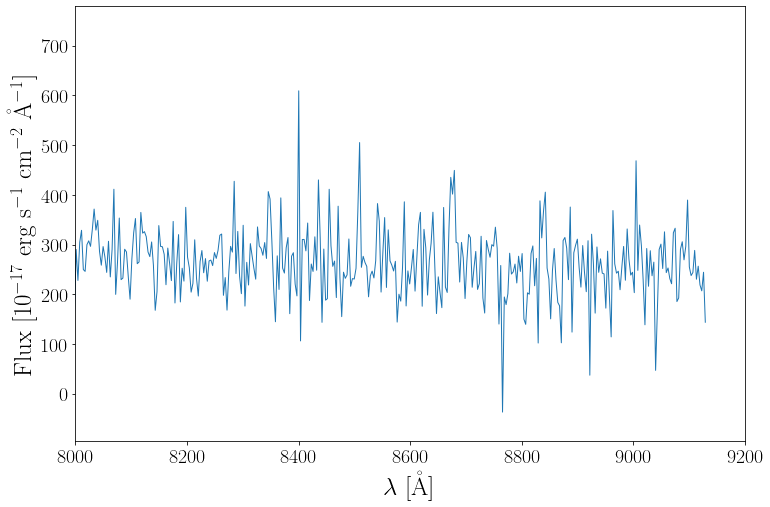

spec1d_d0331_0042-SN2020jgb_host_DEIMOS_20220331T140617.366.fits
Filename: keck_deimos_pypeit/Science/spec1d_d0331_0042-SN2020jgb_host_DEIMOS_20220331T140617.366.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      49   ()      
  1  SPAT0243-SLIT0314-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  2  SPAT0574-SLIT0525-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  3  SPAT0726-SLIT0736-DET03    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1K]   
  4  SPAT0241-SLIT0313-DET07    1 BinTableHDU     92   4096R x 28C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1L, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D,

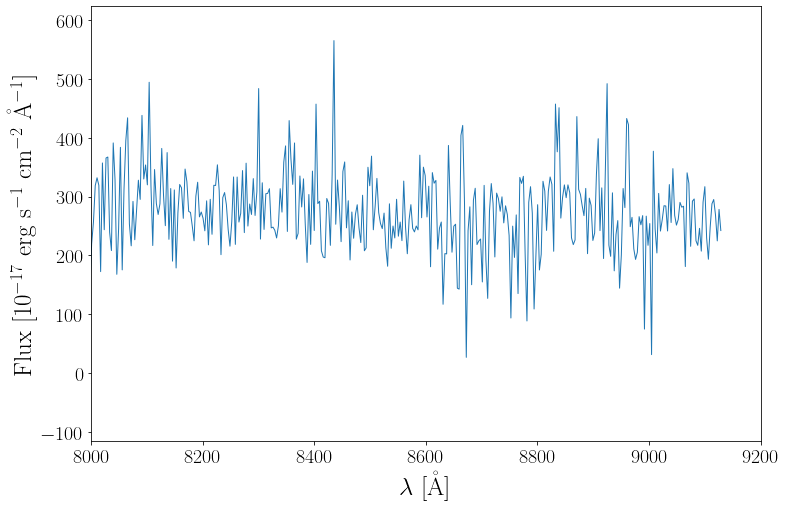

In [11]:
for m, l in enumerate(ls):
    plt.figure(figsize=(12, 8))
    print(l)
    for k in np.arange(1):
        f = fits.open(Sci_folder + l)
        print(f.info())
        #break
        specdata1 = f[3].data
        if m > 0:
            specdata2 = f[6].data
        else:
            specdata2 = f[7].data
        wav = np.append(specdata1['OPT_WAVE'], specdata2['OPT_WAVE'])
        #print(specdata)
        flux = np.append(specdata1['OPT_COUNTS'], specdata2['OPT_COUNTS'])
        f.close()
        plt.plot(wav[::5], flux[::5], linewidth=1)
        #plt.xlim(4400 / (1 + 0.0307), 9000 / (1 + 0.0307))
        plt.xlim(8000, 9200)
        #plt.ylim(0, 3)
        plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
        plt.ylabel(
            r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
        )
    plt.show()

## Coadding

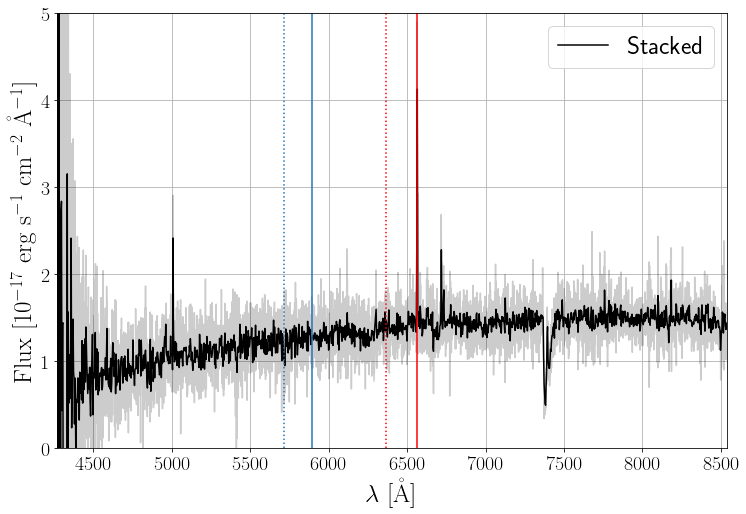

In [12]:
Coadd_folder = 'keck_deimos_pypeit/Coadding/'
f = fits.open(Coadd_folder + 'SN2020jgb_host_coadd.fits')
specdata = f[1].data
f.close()
plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']
unc = specdata['ivar']**-.5
out = data_binning(np.array(
    [specdata['wave'], specdata['flux'], specdata['ivar']**-.5]).T,
                   size=3)
wav1, flux1 = out[:, 0], out[:, 1]
plt.plot(wav / (1 + 0.0307), flux, color='k', alpha=0.2)
plt.plot(wav1 / (1 + 0.0307), flux1, color='k', label='Stacked')
#plt.fill_between(wav, flux-unc, flux+unc, color='0.9', alpha=1)
#plt.xlim(18000, 20000)
plt.xlim(4400 / (1 + 0.0307), 8800 / (1 + 0.0307))
plt.ylim(0, 5)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.legend()
plt.grid()
plt.axvline(5893 / (1 + 0.0307), linestyle=':')
plt.axvline(5893)
plt.axvline(6562 / (1 + 0.0307), color='r', linestyle=':')
plt.axvline(6562, color='r')

## Telluric correction

/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_55513/2086976971.py:12: RuntimeWarning: divide by zero encountered in power
  [specdata['wave'], specdata['flux'], specdata['ivar']**-.5]).T,


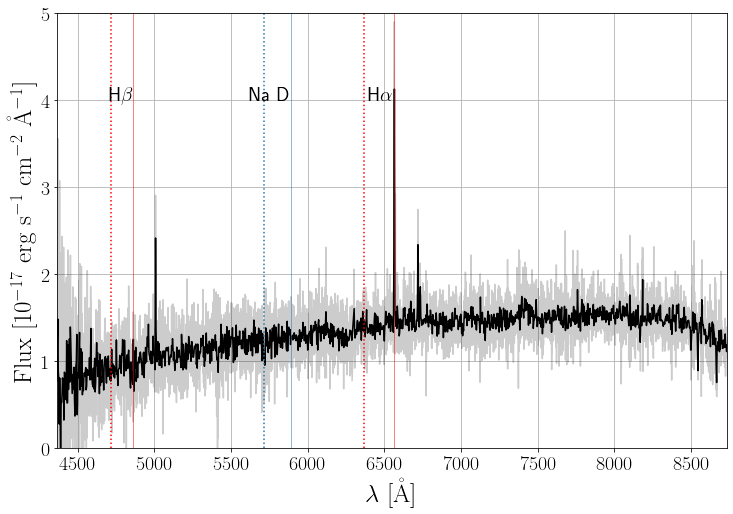

In [13]:
Tell_folder = 'keck_deimos_pypeit/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_host_coadd_tellcorr.fits')
fmodel = fits.open(Tell_folder + 'SN2020jgb_host_coadd_tellmodel.fits')
specdata = f[1].data
model = fmodel[1].data
f.close()
fmodel.close()
plt.figure(figsize=(12, 8))
wav = specdata['wave']
flux = specdata['flux']
out = data_binning(np.array(
    [specdata['wave'], specdata['flux'], specdata['ivar']**-.5]).T,
                   size=3)
wav1, flux1 = out[:, 0], out[:, 1]
plt.plot(wav / (1 + 0.0307), flux, color='k', alpha=0.2)
plt.plot(wav1 / (1 + 0.0307),
         flux1,
         color='k',
         label=r'$\mathrm{Telluric}\ \mathrm{corrected}$')
plt.axvline(5893 / (1 + 0.0307), linestyle=':')
plt.axvline(5893, linewidth=0.5)
plt.text(5893, 4, 'Na D', ha='right', fontsize=20)
plt.axvline(6562 / (1 + 0.0307), color='r', linestyle=':')
plt.axvline(6562, color='r', linewidth=0.5)
plt.text(6562, 4, r'H$\alpha$', ha='right', fontsize=20)
plt.axvline(4861 / (1 + 0.0307), color='r', linestyle=':')
plt.axvline(4861, color='r', linewidth=0.5)
plt.text(4861, 4, r'H$\beta$', ha='right', fontsize=20)
#plt.axvline(6300, color='darkgreen')
plt.xlim(4500 / (1 + 0.0307), 9000 / (1 + 0.0307))
plt.ylim(0, 5)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
#plt.legend()
plt.grid()
#plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
plt.show()

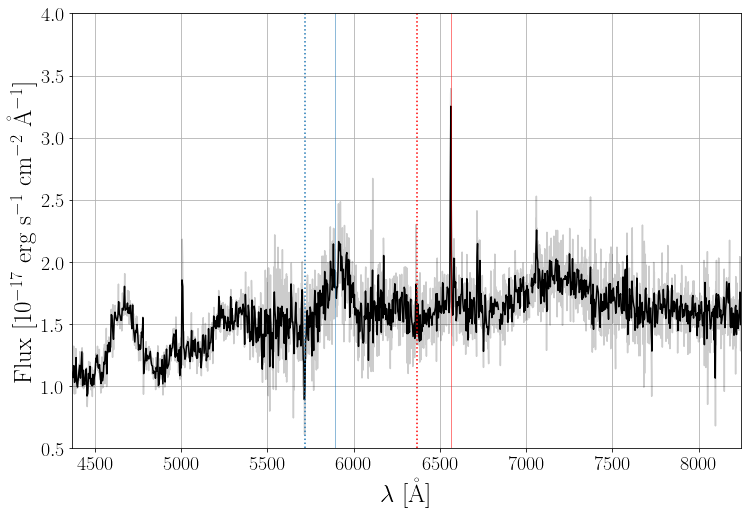

In [14]:
plt.figure(figsize=(12, 8))

obs = np.loadtxt('../SN2020jgb/ZTF20aayhacx_20200915_Keck1_v2.ascii')
out = data_binning(obs, size=3)
wav1, flux1 = out[:, 0], out[:, 1]
plt.plot(wav1 / (1 + 0.0307), flux1 / 1e-17, color='k')
plt.plot(obs[:, 0] / (1 + 0.0307), obs[:, 1] / 1e-17, color='k', alpha=0.2)
plt.axvline(5893 / (1 + 0.0307), linestyle=':')
plt.axvline(5893, linewidth=0.5)
plt.axvline(6562 / (1 + 0.0307), color='r', linestyle=':')
plt.axvline(6562, color='r', linewidth=0.5)
#plt.axvline(6300, color='darkgreen')
plt.xlim(4500 / (1 + 0.0307), 8500 / (1 + 0.0307))
plt.ylim(0.5, 4)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
plt.grid()

## Galactic Extinction

/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_55513/1658240964.py:13: RuntimeWarning: divide by zero encountered in power
  unc = specdata['ivar']**-.5


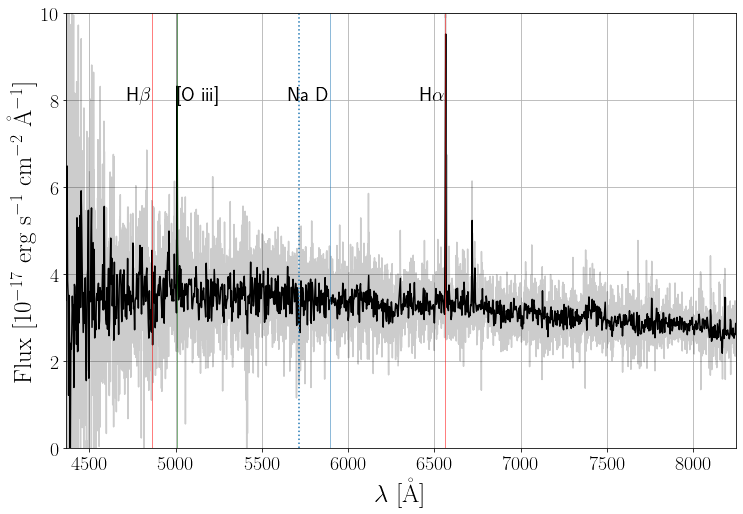

In [15]:
ebv = 0.404
rv = 3.1

Tell_folder = 'keck_deimos_pypeit/Telluric/'
f = fits.open(Tell_folder + 'SN2020jgb_host_coadd_tellcorr.fits')
fmodel = fits.open(Tell_folder + 'SN2020jgb_host_coadd_tellmodel.fits')
specdata = f[1].data
model = fmodel[1].data
f.close()
fmodel.close()
wav = specdata['wave']
flux = specdata['flux']
unc = specdata['ivar']**-.5
X = np.array([wav, flux, unc]).T.copy()
np.savetxt('../SN2020jgb/host_20220331_Keck2.ascii', X, fmt='%.4f')
out = data_binning(X, size=3)
wav1, flux1 = out[:, 0], out[:, 1]

E = 10**(0.4 * calALambda(wav, rv, ebv))
E1 = 10**(0.4 * calALambda(wav1, rv, ebv))

arg = np.argwhere((wav < 8700) & (wav > 4500))
Y = np.array([wav[arg], (flux * E)[arg], (unc * E)[arg]]).T.copy()[0]
np.savetxt('../SN2020jgb/host_20220331_Keck2_corrected.ascii', Y, fmt='%.4f')

plt.figure(figsize=(12, 8))
plt.plot(wav / (1 + 0.0307), flux * E, color='k', alpha=0.2)
plt.plot(wav1 / (1 + 0.0307),
         flux1 * E1,
         color='k',
         label=r'$\mathrm{Telluric}\ \mathrm{corrected}$')
plt.axvline(5893 / (1 + 0.0307), linestyle=':')
plt.axvline(5893, linewidth=0.5)
plt.text(5893, 8, 'Na D', ha='right', fontsize=20)
plt.axvline(6562, color='r', linewidth=0.5)
plt.text(6562, 8, r'H$\alpha$', ha='right', fontsize=20)
plt.axvline(4861, color='r', linewidth=0.5)
plt.text(4861, 8, r'H$\beta$', ha='right', fontsize=20)
plt.axvline(5007, color='darkgreen', linewidth=0.5)
plt.text(5007, 8, r'[O iii]', ha='left', fontsize=20)
#plt.axvline(6300, color='darkgreen')
plt.xlim(4500 / (1 + 0.0307), 8500 / (1 + 0.0307))
#plt.xlim(4500, 7000)
plt.ylim(0, 10)
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(
    r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
)
#plt.legend()
plt.grid()
plt.show()

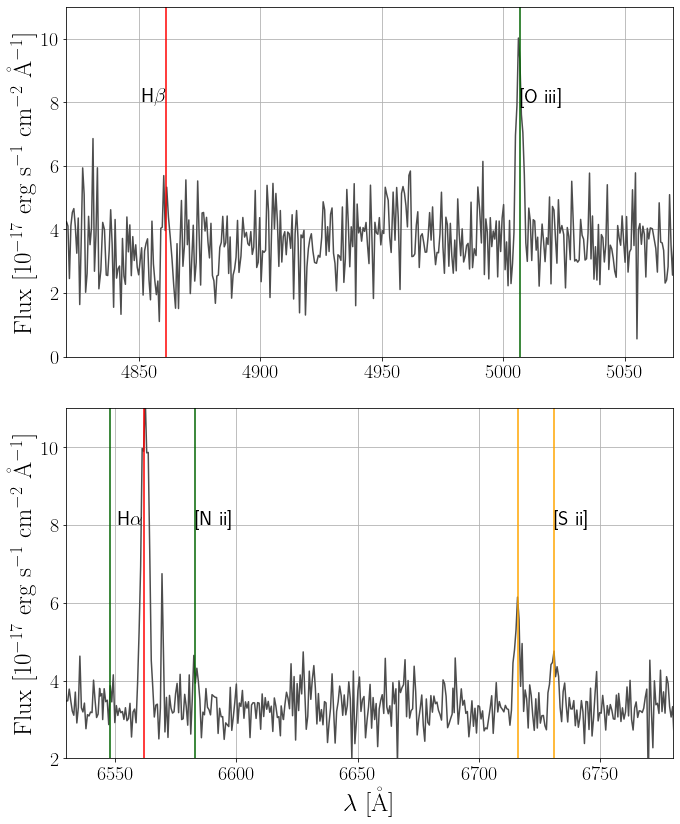

In [16]:
f, ax = plt.subplots(2, 1, figsize=(10, 12))
for a in ax:
    a.plot(wav / (1 + 0.0310), flux * E, color='0.3')
    '''a.plot(wav1 / (1 + 0.0307),
             flux1 * E1,
             color='k',
             label=r'$\mathrm{Telluric}\ \mathrm{corrected}$')
    '''
    a.grid()
    a.set_ylabel(
        r'$\mathrm{Flux}\ [10^{-17}\ \mathrm{erg}\ \mathrm{s}^{-1}\ \mathrm{cm}^{-2}\ \mathrm{\mathring{A}}^{-1}]$'
    )
ax[0].axvline(4861, color='r')
ax[0].text(4861, 8, r'H$\beta$', ha='right', fontsize=20)
ax[0].axvline(5007, color='darkgreen')
ax[0].text(5007, 8, r'[O iii]', ha='left', fontsize=20)
ax[0].set_xlim(4820, 5070)
ax[0].set_ylim(0, 11)
ax[1].axvline(6562, color='r')
ax[1].text(6562, 8, r'H$\alpha$', ha='right', fontsize=20)
ax[1].axvline(6583, color='darkgreen')
ax[1].axvline(6548, color='darkgreen')
ax[1].text(6583, 8, r'[N ii]', ha='left', fontsize=20)
ax[1].axvline(6716, color='orange')
ax[1].axvline(6731, color='orange')
ax[1].text(6731, 8, r'[S ii]', ha='left', fontsize=20)
ax[1].set_xlim(6530, 6780)
ax[1].set_ylim(2, 11)

ax[1].set_xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
#plt.legend()
#plt.savefig('SN2020jgb_Gemini_GNIRS.pdf', bbox_inches='tight')
f.tight_layout()
plt.show()

[O iii]/[H $\beta$] $\sim$ 7/3 $\Rightarrow$ log$\sim$0.4

[N ii]/[H $\alpha$] $\sim$ 1.5/8 $\Rightarrow$ log$\sim$-0.7

## To flux density

In [17]:
arg = np.argwhere((wav < 8700) & (wav > 4500)).ravel()
wv = wav[arg]
fl = (flux * E)[arg]
fl_unc = (unc * E)[arg]

fl_jy = (fl * 1e-17 * u.erg / u.s / u.cm**2 / u.AA).to(
    'Jy', u.spectral_density(wv * u.AA))
fl_unc_jy = (fl_unc * 1e-17 * u.erg / u.s / u.cm**2 / u.AA).to(
    'Jy', u.spectral_density(wv * u.AA))
np.savetxt('host_20220331_Keck2_corrected.ascii',
           np.array([wv, fl_jy, fl_unc_jy]).T,
           fmt='%.4f %.4e %.4e',
           header='Wavelength, Fnu (Jy), Uncertainty (Jy)')

## PanSTARRS mag

In [18]:
r, rsig = 20.8153, 0.1289 #21.0609, 0.0827 - PSF
i, isig = 20.2437, 0.0676 #20.7293, 0.0519 - PSF
z, zsig = 19.9257, 0.1458 #20.4077, 0.1006 - PSF
y, ysig = 19.5079, 0.1869 #- PSF

g_lref = 4849.11  # * u.AA
r_lref = 6201.20  # * u.AA
i_lref = 7534.96  # * u.AA
z_lref = 8674.20  # * u.AA
y_lref = 9627.79  # * u.AA

r_fl = 10**((calALambda(r_lref, rv, ebv) - r) * 0.4) * 3631# * u.Jy
i_fl = 10**((calALambda(i_lref, rv, ebv) - i) * 0.4) * 3631# * u.Jy
z_fl = 10**((calALambda(z_lref, rv, ebv) - z) * 0.4) * 3631# * u.Jy
y_fl = 10**((calALambda(y_lref, rv, ebv) - y) * 0.4) * 3631# * u.Jy

print('{:.2f} {:.2f} {:.2f} {:.2f}'.format(r - calALambda(r_lref, rv, ebv),
                                           i - calALambda(i_lref, rv, ebv),
                                           z - calALambda(z_lref, rv, ebv),
                                           y - calALambda(y_lref, rv, ebv)))
print('{:.2f} {:.2f} {:.2f} {:.2f}'.format(rsig, isig, zsig, ysig))

19.78 19.48 19.32 19.01
0.13 0.07 0.15 0.19


In [19]:
import pandas as pd

forced = pd.read_csv('PS_forced_mean.csv')
forced.columns

Index(['objName', 'nDetections', 'gFKronFlux', 'gFKronFluxErr', 'gFApFlux',
       'gFApFluxErr', 'gFmeanflxR5', 'gFmeanflxR5Err', 'gFlags', 'rFKronFlux',
       'rFKronFluxErr', 'rFApFlux', 'rFApFluxErr', 'rFmeanflxR5',
       'rFmeanflxR5Err', 'rFlags', 'iFKronFlux', 'iFKronFluxErr', 'iFApFlux',
       'iFApFluxErr', 'iFmeanflxR5', 'iFmeanflxR5Err', 'iFlags', 'zFKronFlux',
       'zFKronFluxErr', 'zFApFlux', 'zFApFluxErr', 'zFmeanflxR5',
       'zFmeanflxR5Err', 'zFlags', 'yFKronFlux', 'yFKronFluxErr', 'yFApFlux',
       'yFApFluxErr', 'yFmeanflxR5', 'yFmeanflxR5Err', 'yFlags'],
      dtype='object')

In [20]:
# forced photometry, aperture = 3 arcsec

gfa3_fl = 10**(calALambda(g_lref, rv, ebv) * 0.4) * forced['gFmeanflxR5']
rfa3_fl = 10**(calALambda(r_lref, rv, ebv) * 0.4) * forced['rFmeanflxR5']
ifa3_fl = 10**(calALambda(i_lref, rv, ebv) * 0.4) * forced['iFmeanflxR5']
zfa3_fl = 10**(calALambda(z_lref, rv, ebv) * 0.4) * forced['zFmeanflxR5']
yfa3_fl = 10**(calALambda(y_lref, rv, ebv) * 0.4) * forced['yFmeanflxR5']

gfa3sig = 10**(calALambda(g_lref, rv, ebv) * 0.4) * forced['gFmeanflxR5Err']
rfa3sig = 10**(calALambda(r_lref, rv, ebv) * 0.4) * forced['rFmeanflxR5Err']
ifa3sig = 10**(calALambda(i_lref, rv, ebv) * 0.4) * forced['iFmeanflxR5Err']
zfa3sig = 10**(calALambda(z_lref, rv, ebv) * 0.4) * forced['zFmeanflxR5Err']
yfa3sig = 10**(calALambda(y_lref, rv, ebv) * 0.4) * forced['yFmeanflxR5Err']

# forced photometry, Kron

gfK_fl = 10**(calALambda(g_lref, rv, ebv) * 0.4) * forced['gFKronFlux']
rfK_fl = 10**(calALambda(r_lref, rv, ebv) * 0.4) * forced['rFKronFlux']
ifK_fl = 10**(calALambda(i_lref, rv, ebv) * 0.4) * forced['iFKronFlux']
zfK_fl = 10**(calALambda(z_lref, rv, ebv) * 0.4) * forced['zFKronFlux']
yfK_fl = 10**(calALambda(y_lref, rv, ebv) * 0.4) * forced['yFKronFlux']

gfKsig = 10**(calALambda(g_lref, rv, ebv) * 0.4) * forced['gFKronFluxErr']
rfKsig = 10**(calALambda(r_lref, rv, ebv) * 0.4) * forced['rFKronFluxErr']
ifKsig = 10**(calALambda(i_lref, rv, ebv) * 0.4) * forced['iFKronFluxErr']
zfKsig = 10**(calALambda(z_lref, rv, ebv) * 0.4) * forced['zFKronFluxErr']
yfKsig = 10**(calALambda(y_lref, rv, ebv) * 0.4) * forced['yFKronFluxErr']

# forced photometry, apeture

gfa_fl = 10**(calALambda(g_lref, rv, ebv) * 0.4) * forced['gFApFlux']
rfa_fl = 10**(calALambda(r_lref, rv, ebv) * 0.4) * forced['rFApFlux']
ifa_fl = 10**(calALambda(i_lref, rv, ebv) * 0.4) * forced['iFApFlux']
zfa_fl = 10**(calALambda(z_lref, rv, ebv) * 0.4) * forced['zFApFlux']
yfa_fl = 10**(calALambda(y_lref, rv, ebv) * 0.4) * forced['yFApFlux']

gfasig = 10**(calALambda(g_lref, rv, ebv) * 0.4) * forced['gFApFluxErr']
rfasig = 10**(calALambda(r_lref, rv, ebv) * 0.4) * forced['rFApFluxErr']
ifasig = 10**(calALambda(i_lref, rv, ebv) * 0.4) * forced['iFApFluxErr']
zfasig = 10**(calALambda(z_lref, rv, ebv) * 0.4) * forced['zFApFluxErr']
yfasig = 10**(calALambda(y_lref, rv, ebv) * 0.4) * forced['yFApFluxErr']

In [21]:
for fl, sig in zip([gfK_fl, rfK_fl, ifK_fl, zfK_fl, yfK_fl],
                         [gfKsig, rfKsig, ifKsig, zfKsig, yfKsig]):
    #print(fl[0], sig[0])
    print('{:.2f} {:.2f}'.format(-2.5 * np.log10(fl / 3631)[0], 2.5 / 2 * np.log10(
        (fl + sig) / (fl - sig))[0]))

20.08 0.13
19.54 0.05
19.46 0.07
19.34 0.05
19.09 0.16


In [22]:
# stacked image, Kron

stack = pd.read_csv('PS_stacked.csv')

gs_fl = 10**(calALambda(g_lref, rv, ebv) * 0.4) * stack['gKronFlux']
rs_fl = 10**(calALambda(r_lref, rv, ebv) * 0.4) * stack['rKronFlux']
is_fl = 10**(calALambda(i_lref, rv, ebv) * 0.4) * stack['iKronFlux']
zs_fl = 10**(calALambda(z_lref, rv, ebv) * 0.4) * stack['zKronFlux']
ys_fl = 10**(calALambda(y_lref, rv, ebv) * 0.4) * stack['yKronFlux']

gssig = 10**(calALambda(g_lref, rv, ebv) * 0.4) * stack['gKronFluxErr']
rssig = 10**(calALambda(r_lref, rv, ebv) * 0.4) * stack['rKronFluxErr']
issig = 10**(calALambda(i_lref, rv, ebv) * 0.4) * stack['iKronFluxErr']
zssig = 10**(calALambda(z_lref, rv, ebv) * 0.4) * stack['zKronFluxErr']
yssig = 10**(calALambda(y_lref, rv, ebv) * 0.4) * stack['yKronFluxErr']

In [23]:
# Petrosian
Jp, Jpsig = 18.2466 + 0.916, 0.1539
Kp, Kpsig = 17.3483 + 1.827, 0.3066
# Aperture (diag = 2 arcsec)
J, Jsig = 18.8708 + 0.916, 0.1539
K, Ksig = 17.9290 + 1.827, 0.3066
# Aperture (diag = 2.7 arcsec)
J3, J3sig = 18.5365 + 0.916, 0.1539
K3, K3sig = 17.7078 + 1.827, 0.3066
J_lref = 12540.
K_lref = 21490.

Jp_fl = 10**((calALambda(J_lref, rv, ebv) - Jp) * 0.4) * 3631  # * u.Jy
Kp_fl = 10**((calALambda(K_lref, rv, ebv) - Kp) * 0.4) * 3631  # * u.Jy
J_fl = 10**((calALambda(J_lref, rv, ebv) - J) * 0.4) * 3631  # * u.Jy
K_fl = 10**((calALambda(K_lref, rv, ebv) - K) * 0.4) * 3631  # * u.Jy
J3_fl = 10**((calALambda(J_lref, rv, ebv) - J3) * 0.4) * 3631  # * u.Jy
K3_fl = 10**((calALambda(K_lref, rv, ebv) - K3) * 0.4) * 3631  # * u.Jy

print(Jp - calALambda(J_lref, rv, ebv), Jpsig)
print(Kp - calALambda(K_lref, rv, ebv), Kpsig)

18.842882801272932 0.1539
19.033411355197266 0.3066


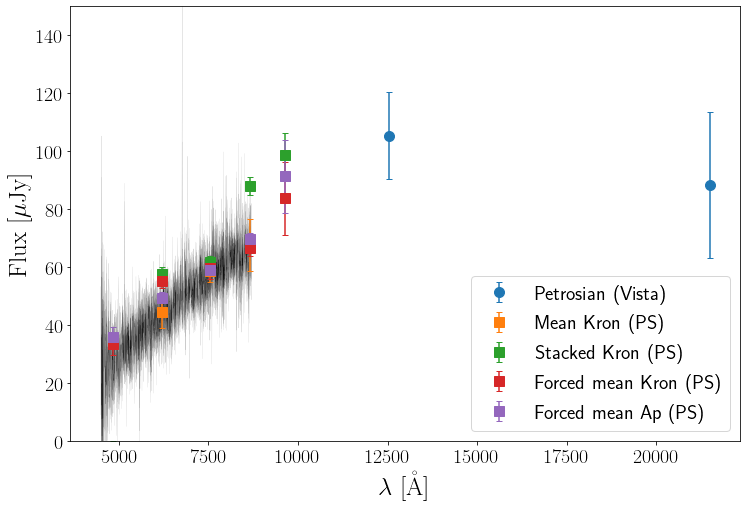

In [24]:
plt.figure(figsize=(12, 8))
plt.plot(wv, fl_jy * 1e6, color='k', alpha=1, linewidth=0.05)
lref = np.array([J_lref, K_lref])
f = np.array([Jp_fl, Kp_fl])
sig = np.array([Jpsig, Kpsig])
unc = f * (10**(0.4 * sig) - 10**(-0.4 * sig)) / 2
plt.errorbar(lref,
             f * 1e6,
             yerr=unc * 1e6,
             fmt='o',
             capsize=3,
             ms=10,
             label='Petrosian (Vista)')

lref = np.array([r_lref, i_lref, z_lref])
f = np.array([r_fl, i_fl, z_fl])
sig = np.array([rsig, isig, zsig])
unc = f * (10**(0.4 * sig) - 10**(-0.4 * sig)) / 2
plt.errorbar(lref,
             f * 1e6,
             yerr=unc * 1e6,
             fmt='s',
             capsize=3,
             ms=10,
             label='Mean Kron (PS)')

lref = np.array([g_lref, r_lref, i_lref, z_lref, y_lref]).ravel()
f = np.array([gs_fl, rs_fl, is_fl, zs_fl, ys_fl]).ravel()
sig = np.array([gssig, rssig, issig, zssig, yssig]).ravel()
plt.errorbar(lref,
             f * 1e6,
             yerr=sig * 1e6,
             fmt='s',
             capsize=3,
             ms=10,
             label='Stacked Kron (PS)')

f = np.array([gfK_fl, rfK_fl, ifK_fl, zfK_fl, yfK_fl]).ravel()
sig = np.array([gfKsig, rfKsig, ifKsig, zfKsig, yfKsig]).ravel()
plt.errorbar(lref,
             f * 1e6,
             yerr=sig * 1e6,
             fmt='s',
             capsize=3,
             ms=10,
             label='Forced mean Kron (PS)')

f = np.array([gfa_fl, rfa_fl, ifa_fl, zfa_fl, yfa_fl]).ravel()
sig = np.array([gfasig, rfasig, ifasig, zfasig, yfasig]).ravel()
plt.errorbar(lref,
             f * 1e6,
             yerr=sig * 1e6,
             fmt='s',
             capsize=3,
             ms=10,
             label='Forced mean Ap (PS)')

#plt.axvline(6300, color='darkgreen')
#plt.xlim(4500, 9000)
#plt.xlim(4500, 7000)
plt.ylim(0, 1.5e2)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(r'$\mathrm{Flux}\ [\mu\mathrm{Jy}]$')
plt.legend(prop={'size':20})

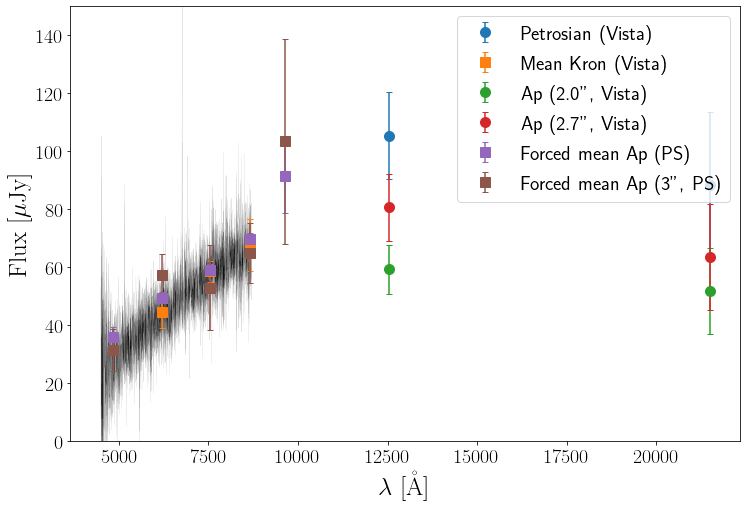

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(wv, fl_jy * 1e6, color='k', alpha=1, linewidth=0.05)
lref = np.array([J_lref, K_lref])
f = np.array([Jp_fl, Kp_fl])
sig = np.array([Jpsig, Kpsig])
unc = f * (10**(0.4 * sig) - 10**(-0.4 * sig)) / 2
plt.errorbar(lref,
             f * 1e6,
             yerr=unc * 1e6,
             fmt='o',
             capsize=3,
             ms=10,
             label='Petrosian (Vista)')

lref = np.array([r_lref, i_lref, z_lref])
f = np.array([r_fl, i_fl, z_fl])
sig = np.array([rsig, isig, zsig])
unc = f * (10**(0.4 * sig) - 10**(-0.4 * sig)) / 2
plt.errorbar(lref,
             f * 1e6,
             yerr=unc * 1e6,
             fmt='s',
             capsize=3,
             ms=10,
             label='Mean Kron (Vista)')

lref = np.array([J_lref, K_lref])
f = np.array([J_fl, K_fl])
sig = np.array([Jsig, Ksig])
unc = f * (10**(0.4 * sig) - 10**(-0.4 * sig)) / 2
plt.errorbar(lref,
             f * 1e6,
             yerr=unc * 1e6,
             fmt='o',
             capsize=3,
             ms=10,
             label='Ap (2.0\'\', Vista)')

f = np.array([J3_fl, K3_fl])
sig = np.array([J3sig, K3sig])
unc = f * (10**(0.4 * sig) - 10**(-0.4 * sig)) / 2
plt.errorbar(lref,
             f * 1e6,
             yerr=unc * 1e6,
             fmt='o',
             capsize=3,
             ms=10,
             label='Ap (2.7\'\', Vista)')

lref = np.array([g_lref, r_lref, i_lref, z_lref, y_lref]).ravel()
f = np.array([gfa_fl, rfa_fl, ifa_fl, zfa_fl, yfa_fl]).ravel()
sig = np.array([gfasig, rfasig, ifasig, zfasig, yfasig]).ravel()
plt.errorbar(lref,
             f * 1e6,
             yerr=sig * 1e6,
             fmt='s',
             capsize=3,
             ms=10,
             label='Forced mean Ap (PS)')

f = np.array([gfa3_fl, rfa3_fl, ifa3_fl, zfa3_fl, yfa3_fl]).ravel()
sig = np.array([gfa3sig, rfa3sig, ifa3sig, zfa3sig, yfa3sig]).ravel()
plt.errorbar(lref,
             f * 1e6,
             yerr=sig * 1e6,
             fmt='s',
             capsize=3,
             ms=10,
             label='Forced mean Ap (3\'\', PS)')

#plt.axvline(6300, color='darkgreen')
#plt.xlim(4500, 9000)
#plt.xlim(4500, 7000)
plt.ylim(0, 1.5e2)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$\lambda\ [\mathrm{\mathring{A}}]$')
plt.ylabel(r'$\mathrm{Flux}\ [\mu\mathrm{Jy}]$')
plt.legend(prop={'size': 20})

In [26]:
from fits2ascii import fits2ascii

/Users/chang/Desktop/SNIa/SN2020jgb/spectroscopy/Host_DEIMOS_reduction/../../tools/fits2ascii.py:10: RuntimeWarning: divide by zero encountered in power
  unc = sn[1].data["ivar"] ** -0.5


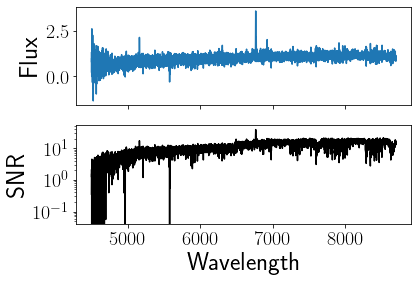

In [27]:
fits2ascii('keck_deimos_pypeit/Telluric/SN2020jgb_host_coadd_tellcorr.fits',
           '../SN2020jgb/host_20220331_Keck2.ascii',
           lower=4500,
           upper=8700)